# Amazon Cell Phone Reviews / Natural Language Process
## (Self-Guided Project)

## by Justin Sierchio

In this project, we will be looking at using Amazon cell phone reviews to learn about natural language processing.

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/yaowenling/amazon-cell-phone-review-nlp. More information related to the dataset can be found at the same link

Note: this is a self-guided project following the tutorial provided by Wenling Yao at Kaggle.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_items = pd.read_csv("20191226-items.csv")
df_reviews = pd.read_csv("20191226-reviews.csv")

print('Datasets uploaded!');

Datasets uploaded!


Let's display the first 5 rows for each of these datasets.

In [3]:
# Display 1st 5 rows of Amazon Items dataset
df_items.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [4]:
# Display 1st 5 rows of Amazon reviews dataset
df_reviews.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


## Exploratory Data Analysis

Let us first look at the different brands and number of offerings of cell phones on Amazon.

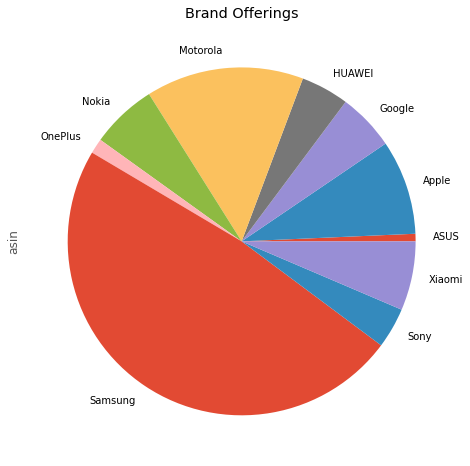

In [5]:
# Plot Brand Offerings of Cell Phones on Amazon

# Pick Style of Plot
plt.style.use("ggplot")

# Determine Brand Distribution
ax = df_items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(12, 8),
                                                 title="Brand Offerings")
plt.show()

As we can see, Amazon's offerings predominantly feature Samsung, Motorola and Apple. 

Let's take a look at the ratings per brand.

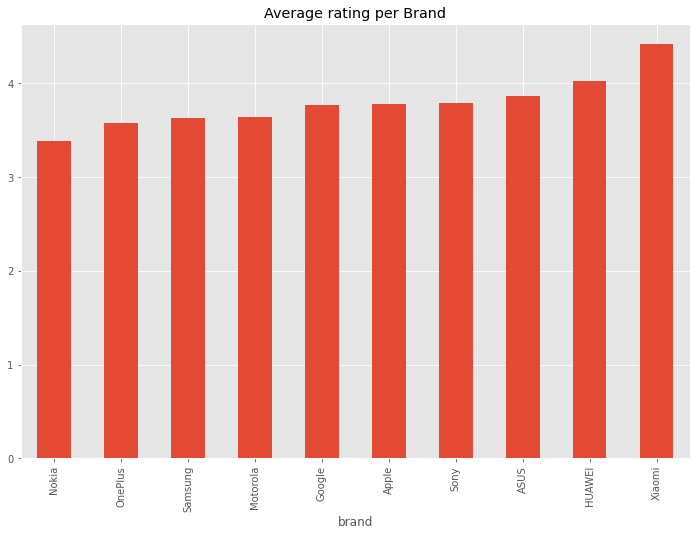

In [6]:
# Plot the Average Brand Raing
ax = df_items.groupby("brand").mean()["rating"].sort_values().plot(kind="bar",
                                                                figsize=(12,8), 
                                                                title="Average rating per Brand")
plt.show()

As shown in the plot above, the highest rated cell phone brands are Xiaomi and HUAWEI. The lowest rated brands are Nokia and OnePlus.

Now let's merge the datasets using 'asin' as the primary key.

In [7]:
# Link Reviews to Items using 'asin' as primary key
df_reviews = pd.merge(df_reviews, df_items, how="left", left_on="asin", right_on="asin")

Now we will rename the columns and show the merged dataset.

In [8]:
# Rename columns for merged dataset
df_reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", 
                        "rating_y": "overall_rating"}, inplace=True)

# Display 1st 5 rows of merged dataset
df_reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


Now that we have the merged dataset, let's do some data cleaning. We will begin with the datatime structures.

In [9]:
# Fix Datetimes
from datetime import datetime
df_reviews["date"] = df_reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
df_reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [10]:
# Truncate date column to month
df_reviews["month"] = df_reviews["date"].apply(lambda x: x.replace(day=1))
df_reviews["month"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: month, dtype: datetime64[ns]

Now let's plot the number of reviews over time.

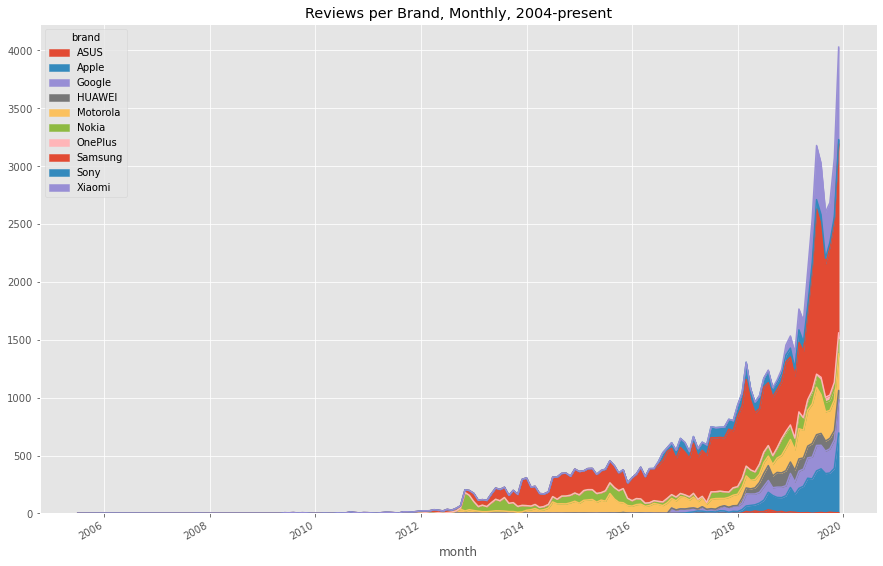

In [11]:
# Plot number of reviews over time
ax = pd.pivot_table(df_reviews, 
                    index="month", 
                    columns="brand", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Reviews per Brand, Monthly, 2004-present", figsize=(15, 10))

As we can see, while Samsung and Apple have the most reviws, Xiaomi has the highest rating.

Let's add a positivity column to our dataset.

In [12]:
# Adding a positivity label
df_reviews["positivity"] = df_reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

## Data Cleaning

Here we want to clean up the text in order to better analyze the reviews. Let's first install the needed libraries.

In [13]:
# Install needed libraries
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jmsie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmsie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now we are going to construct a funciton to process the words in the reviews. First, we need to clean the text by removing excess punctuation, stopwords and non relevant keywords. To accomplish this task, we will use the WordNetLemmatizer method from the NLTK library.

In [14]:
# Review Text

# Define function to preprocess text
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = df_reviews["brand"].apply(lambda x: str(x).lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'love reading book'

As one can see, we converted 'I love reading books' into 'love reading book', making the language easier to process. Now we will apply the clean_text function to the entire dataframe.

In [15]:
# Use preprocess function on dataframe
df_reviews["body"] = df_reviews["body"].astype("str")
df_reviews["clean_text"] = df_reviews["body"].apply(clean_text)

print('Dataframe text cleaned!')

Dataframe text cleaned!


Now that we have the text cleaned, let's look at an example using the first 5 rows.

In [16]:
# Show 1st 5 rows of cleaned text
df_reviews["clean_text"].head().values

array(["a600 awhile absolute doo doo read review detect rage stupid thing finally died used bought garage sale 1 wonder sold cheap bad  hate menu take forever get want scroll endlessly usually phone numbered category u simply press  get want go  pain put silent vibrate class ring turn immediately there's fast way silence damn thing always remember put silent learned hard way  true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening  button could bit bigger vibration could stronger good  reception shabby using elevator remarkable feat considering old would lose service simply putting pocket  compared old work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos  nice bright large screen  cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get great",
       "due softwa

## Generating Word Clouds

At this stage, we now want to generate word clouds, which represent in a pictoral way the frequency of major words in a dataset. We will generate word clouds for the latest 1000 positive and negative reviews for each of Apple and Samsung separately. The same methodology could be applied to any phone manufacturer.

To begin, we will create a word frequency function, import WordCloud functions and then apply those functions to our dataset.

In [17]:
# Creating a Word Cloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

Next, we create brand subsets.

In [18]:
# Creating brand subsetes
apple = df_reviews[df_reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = df_reviews[df_reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = df_reviews[df_reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)

Now we import the necessary WordCloud libraries.

In [19]:
# Import WordCloud Libraries
import sys
from wordcloud import WordCloud, ImageColorGenerator

Then we define a function to generate a word cloud.

In [20]:
# Define a word cloud function
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

Now we will define a function to plot the top 10 positive words and top 10 negative words in a bar plot.

In [21]:
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

Now that we have our functions, let's make a word cloud for Apple.

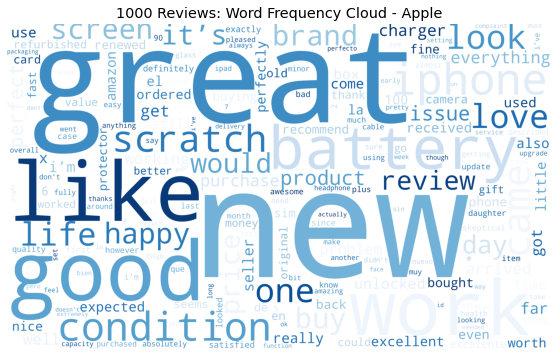

In [22]:
# Create word cloud from 1000 Apple reviews
apple_pos = " ".join(apple[apple["positivity"]==1]["clean_text"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "1000 Reviews: Word Frequency Cloud - Apple")

In [23]:
apple["renewed"] = apple["item_title"].apply(lambda x: ("Renewed" in x) | ("Refurbished" in x))
print("{0: 0.1%} iPhones sold on Amazon are refurbished.".format(apple["renewed"].sum() / len(apple["renewed"])))

 100.0% iPhones sold on Amazon are refurbished.


Looking at the Apple reviews, 100% of them are for renewed iPhones sold on Amazon. Buyers appear to be quite satisfied if the phone is nearly new. Let's show a bar plot of the phones were described as 'new'.

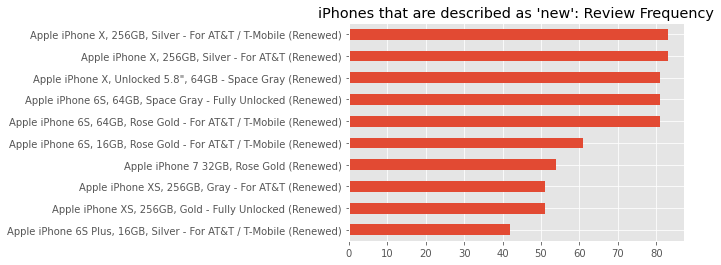

In [24]:
apple[apple["clean_text"].apply(lambda x: "new" in x)]["item_title"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("iPhones that are described as 'new': Review Frequency")
plt.show()

Now let's take a look at the negative reviews.

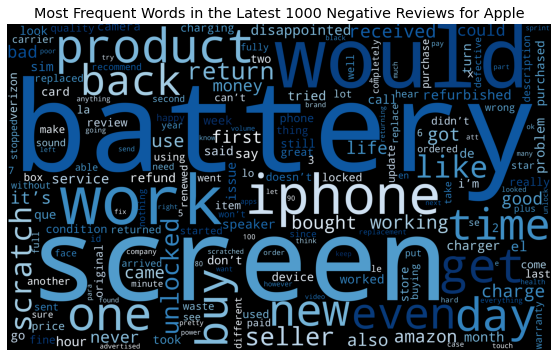

In [25]:
# Create a wordcloud from the the negative reviews.
apple_neg = " ".join(apple[apple["positivity"]==-1]["clean_text"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

Now let us plot on a bar plot the top 10 positive and negative words associated with Apple iPhones reviewed on Amazon.

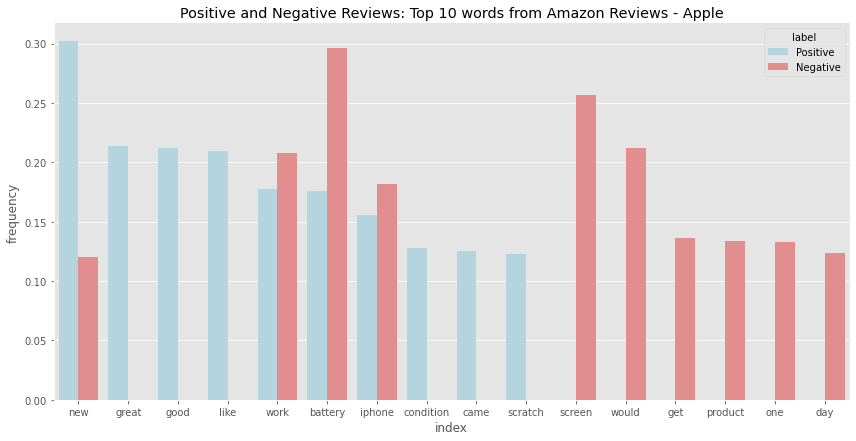

In [26]:
# Generate Bar Plot for Positive/Negative Amazon Reviews
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(apple["positivity"]==1), 1000), 
                       min(sum(apple["positivity"]==-1), 1000), 
                       10, 
                       "Positive and Negative Reviews: Top 10 words from Amazon Reviews - Apple", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)

For the sake of completeness, let's conduct a similar analysis for Samsung.

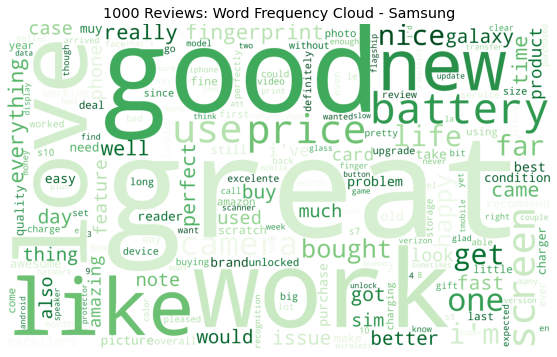

In [27]:
# Create word cloud from 1000 Samsung reviews
samsung_pos = " ".join(samsung[samsung["positivity"]==1]["clean_text"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "1000 Reviews: Word Frequency Cloud - Samsung")

## Vectorization / Topic Modeling

In order to extract features from each text, a conversion from an original text to a document-term matrix is needed. The latter has feature names that are words and values which are shown at a scaled frequency. We want a scaled frequency so that important words (those with informational content) are not downplayed in favor of other words that may not contain much useful insight.

To begin, we need to import a TF-IDF Vectorizer.

In [28]:
# Import Libraries for TF-IDF Vectorization
import time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.05, stop_words="english")

Next, we initialize an LDA mode.

In [29]:
# Initalize LDA model
from sklearn.decomposition import LatentDirichletAllocation
n_topics=10
lda = LatentDirichletAllocation(n_components=n_topics, 
                                max_iter=50, 
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

Now let us define a function to print the topics for the LDA model.

In [30]:
# Function Definition to print LDA model topics
def print_topn_words(model, feature_names, topn):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-topn - 1:-1]])
        print(message)
    print()

With the function prepared, let's run the LDA model on the Apple reviews.

In [31]:
# LDA model applied to Apple
t0 = time.time()
apple_tfidf = tfidf_vectorizer.fit_transform(apple["clean_text"])
apple_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(apple_tfidf)
print("LDA output from {} topics (Top 10 words) for Apple.".format(n_topics))
print_topn_words(lda, apple_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

LDA output from 10 topics (Top 10 words) for Apple.
Topic #0: like new look brand work came scratch battery happy buy
Topic #1: problem working day got refurbished iphone work screen time seller
Topic #2: iphone bought use buy refurbished new got purchase work day
Topic #3: charger time came work good got screen great scratch like
Topic #4: great price issue review got use day scratch battery like
Topic #5: product far good great working work new scratch buy came
Topic #6: screen scratch seller purchase happy battery new came review iphone
Topic #7: love work unlocked great bought scratch use iphone day new
Topic #8: good battery life scratch work new iphone day came great
Topic #9: condition perfect came great work scratch new iphone good battery

Done in 26.135s.


Not surprisingly, Apple owners care about problems related to battery life.

In [32]:
# LDA model applied to Samsung
t0 = time.time()
samsung_tfidf = tfidf_vectorizer.fit_transform(samsung["clean_text"])
samsung_tfidf_feature_names = tfidf_vectorizer.get_feature_names()
lda.fit(samsung_tfidf)
print("LDA output from {} topics (Top 10 words) for Samsung.".format(n_topics))
print_topn_words(lda, samsung_tfidf_feature_names, 10)
print("Done in %0.3fs." % (time.time() - t0))

LDA output from 10 topics (Top 10 words) for Samsung.
Topic #0: new issue galaxy ve like note work time phone screen
Topic #1: product like buy new good great time phone work day
Topic #2: great note price better work love use new screen buy
Topic #3: battery life need used great day screen use good camera
Topic #4: good price got better great new work camera like use
Topic #5: work bought phone great new use got like time good
Topic #6: love sim card new work use got came great need
Topic #7: screen verizon really like use note work time got phone
Topic #8: fast came far camera great good new work screen love
Topic #9: use problem time month day got screen phone bought work

Done in 156.687s.


While Samsung owners like the value, they also are concerned about battery life.

## Feature Importance for Classification of Sentiments

Now we can use the feature vectorization to classify the seniments. This part of the project will involve using the XGBoost classifer model.

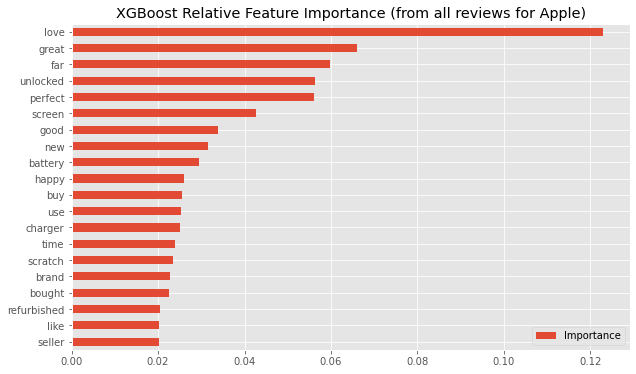

In [33]:
# Using XGBoost for plotting relative feature importance
# (Example for Apple)

# Import needed library
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(apple_tfidf, apple["positivity"])
featureImport = pd.DataFrame(xgb_clf.feature_importances_, index=apple_tfidf_feature_names)
featureImport.columns = ["Importance"]
featureImport.sort_values(["Importance"], ascending=True).tail(20).plot(kind="barh", figsize=(10, 6))
plt.title("XGBoost Relative Feature Importance (from all reviews for Apple)")
plt.show()